<a href="https://colab.research.google.com/github/AdiAkhileshSingh15/hardness-prediction-using-extra-parameters/blob/main/AI_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.7 MB/s eta 0:00:00


In [3]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
from sklearn.ensemble import StackingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Add, Input, Dense, Dropout, BatchNormalization, Embedding, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam
from keras.layers import concatenate
from tensorflow.keras import regularizers
from keras.regularizers import l1
from keras.regularizers import l2
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from matplotlib import pyplot as pl
from scipy.stats import sem

import pandas as pd
import numpy as np

import pickle
import random

import sys
import os

In [4]:
# importing modules 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# making dataset from the csv file
data=pd.read_csv("dataset_hardness.csv")
data.head()

,SiO2,Na2O,Al2O3,CaO,TiO2,MgO,P2O5,B2O3,Li2O,Er2O3,K2O,Yb2O3,MnO,Fe2O3,Load,T_annealing,TIME,Hardness,PII,Remarks
0,86.0,10.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,50,600.0,2.0,6000000000,S0022309315301873,NaN
1,83.0,10.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,50,600.0,2.0,5100000000,S0022309315301873,NaN
2,80.0,10.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,50,600.0,2.0,6200000000,S0022309315301873,NaN
3,81.0,15.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,50,600.0,2.0,5100000000,S0022309315301873,NaN
4,78.0,15.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,50,600.0,2.0,6200000000,S0022309315301873,NaN


In [5]:
# the total tags of the data
df = data[['SiO2', 'Na2O', 'Al2O3', 'CaO', 'TiO2', 'MgO', 'P2O5', 'B2O3', 'Li2O',
       'Er2O3', 'K2O', 'Yb2O3', 'MnO', 'Fe2O3','Load','T_annealing','Hardness']]
# the input data attributes
X = df[['SiO2', 'Na2O', 'Al2O3', 'CaO', 'TiO2', 'MgO', 'P2O5', 'B2O3', 'Li2O',
       'Er2O3', 'K2O', 'Yb2O3', 'MnO', 'Fe2O3','Load','T_annealing']]
# the output data attribute
y = df["Hardness"]

# splititng data for training and testing
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8, random_state = 0)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size = 0.5, random_state = 0)

In [6]:
# linear regression model
lin_regr = LinearRegression()
lin_regr.fit(X_train,y_train)
y_pred = lin_regr.predict(X_train)
y_pred1 = lin_regr.predict(X_test)
from sklearn.metrics import r2_score
# printing r2 scores
lin_regr_score = r2_score(y_train, y_pred)
print(lin_regr_score)
lin_regr_score1 = r2_score(y_test, y_pred1)
print(lin_regr_score1)

0.7649544640156457
0.8569099516531293


In [7]:
# random forest regression model
ran_for = RandomForestRegressor()
ran_for.fit(X_train,y_train)
y_pred = ran_for.predict(X_train)
y_pred1 = ran_for.predict(X_test)

# printing r2 scores
ran_for_score = r2_score(y_train, y_pred)
print(ran_for_score)
ran_for_score1 = r2_score(y_test, y_pred1)
print(ran_for_score1)

0.9626502507063386
0.8727083903181158


In [8]:
# gradient boosting regression model
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_train)
y_pred1 = gbr.predict(X_test)

# printing r2 scores
gbr_score = r2_score(y_train, y_pred)
print(gbr_score)
gbr_score1 = r2_score(y_test, y_pred1)
print(gbr_score1)

0.986697562631916
0.8510624908792103


In [9]:
# lasso regression model
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred = lasso.predict(X_train)
y_pred1 = lasso.predict(X_test)

# printing r2 scores
lasso_score = r2_score(y_train, y_pred)
print(lasso_score)
lasso_score1 = r2_score(y_test, y_pred1)
print(lasso_score1)

0.7587609595533347
0.8926265382027356


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.115e+19, tolerance: 1.753e+16
  model = cd_fast.enet_coordinate_descent(


In [10]:
# ridge regression model
ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_train)
y_pred1 = ridge.predict(X_test)

# printing r2 scores
ridge_score = r2_score(y_train, y_pred)
print(ridge_score)
ridge_score1 = r2_score(y_test, y_pred1)
print(ridge_score1)

0.7573481634864512
0.9059732958621366


In [11]:
# elastic net
eln = ElasticNet()
eln.fit(X_train,y_train)
y_pred = eln.predict(X_train)
y_pred1 = eln.predict(X_test)

# printing r2 scores
eln_score = r2_score(y_train, y_pred)
print(eln_score)
eln_score1 = r2_score(y_test, y_pred1)
print(eln_score1)

0.7517026829319426
0.917261060348693


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.203e+19, tolerance: 1.753e+16
  model = cd_fast.enet_coordinate_descent(


In [12]:
# knn model
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_train)
y_pred1 = knn.predict(X_test)

# printing r2 scores
knn_score = r2_score(y_train, y_pred)
print(knn_score)
knn_score1 = r2_score(y_test, y_pred1)
print(knn_score1)

0.8284131039395215
0.925756008281763


In [13]:
# defining the first meta model
level0 = list()

estimators_list = [
        ('abr', AdaBoostRegressor())
]

# stacking the levels to make the meta model
meta_model1 = StackingRegressor(estimators=estimators_list, final_estimator=KNeighborsRegressor(), cv=5)
meta_model1.fit(X_train, y_train)

StackingRegressor(cv=5, estimators=[('abr', AdaBoostRegressor())],
                  final_estimator=KNeighborsRegressor())

In [14]:
y_pred = meta_model1.predict(X_train)
y_pred1 = meta_model1.predict(X_test)
from sklearn.metrics import r2_score
meta_model1_score = r2_score(y_train, y_pred)
print(meta_model1_score)
meta_model1_score1 = r2_score(y_test, y_pred1)
print(meta_model1_score1)

0.8384647525153689
0.7798194369773853


In [15]:
def create_neural_network(input_shape, depth=15, batch_mod=2, num_neurons=64, drop_rate=0.1, learn_rate=.01):
    act_reg = l1(0.02)
    kern_reg = l1(0.02)
    
    inputs = Input(shape=(input_shape,))
    batch1 = BatchNormalization()(inputs)
    hidden1 = Dense(num_neurons, activation='relu', kernel_regularizer=kern_reg, activity_regularizer=act_reg)(batch1)
    dropout1 = Dropout(drop_rate)(hidden1)
    hidden2 = Dense(int(num_neurons/2), activation='relu', kernel_regularizer=kern_reg, activity_regularizer=act_reg)(dropout1)
    
    skip_list = [batch1]
    last_layer_in_loop = hidden2
    
    for i in range(depth):
        added_layer = concatenate(skip_list + [last_layer_in_loop])
        skip_list.append(added_layer)
        b1 = None
        #Apply batch only on every i % N layers
        if i % batch_mod == 2:
            b1 = BatchNormalization()(added_layer)
        else:
            b1 = added_layer
        
        h1 = Dense(num_neurons, activation='relu', kernel_regularizer=kern_reg, activity_regularizer=act_reg)(b1)
        d1 = Dropout(drop_rate)(h1)
        h2 = Dense(int(num_neurons/2), activation='relu', kernel_regularizer=kern_reg, activity_regularizer=act_reg)(d1)
        d2 = Dropout(drop_rate)(h2)
        h3 =  Dense(int(num_neurons/2), activation='relu', kernel_regularizer=kern_reg, activity_regularizer=act_reg)(d2)
        d3 = Dropout(drop_rate)(h3)
        h4 =  Dense(int(num_neurons/2), activation='relu', kernel_regularizer=kern_reg, activity_regularizer=act_reg)(d3)
        last_layer_in_loop = h4
        c1 = concatenate(skip_list + [last_layer_in_loop])
        output = Dense(1, activation='sigmoid')(c1)
    
    model = Model(inputs=inputs, outputs=output)
    optimizer = Adam()
    optimizer.learning_rate = learn_rate
    
    model.compile(optimizer=optimizer,
                  loss='mse',
                  metrics=['accuracy'])
    return model

In [16]:
def get_stacking(input_shape=None):
    '''A stacking model that consists of CatBoostRegressor,
    XGBRegressor, a linear model, and some neural networks'''
    # First we create a list called "level0", which consists of our base models"
    # Basically, you'll want to pick a assortment of your favorite machine learning models
    # These models will get passed down to the meta-learner later
    level0 = list()
    level0.append(('cat', CatBoostRegressor(verbose=False)))
    level0.append(('rf',RandomForestRegressor(n_estimators = 1000, random_state = 42)))
    level0.append(('ada', AdaBoostRegressor()))
    level0.append(('cat2', CatBoostRegressor(verbose=False, learning_rate=.0001)))
    level0.append(('xgb', XGBRegressor()))
    level0.append(('xgb2', XGBRegressor(max_depth=5, learning_rate=.0001)))
    level0.append(('linear', LinearRegression()))
    #Create 5 neural networks using our function above
    for i in range(5):
        keras_reg = KerasRegressor(
                create_neural_network, 
                input_shape=input_shape,
                epochs=6,
                batch_size=32,
                verbose=False)
        keras_reg._estimator_type = "regressor"
        # Append to our list
        level0.append(('nn_{num}'.format(num=i), keras_reg))
    # The "meta-learner" designated as the level1 model
    level1 = LinearRegression()
    # Create the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=2, verbose=1)
    return model

In [17]:
#Get our input dimensions for neural network
input_dimensions = len(X_train.columns)
# Create stacking model
meta_model2 = get_stacking(input_dimensions)
meta_model2.fit(X_train, y_train.values.ravel())
# Creating a temporary dataframe so we can see how each of our models performed
temp = pd.DataFrame(y_val)
# The stacked models predictions, which should perform the best
temp['stacking_prediction'] = meta_model2.predict(X_val)
# Get each model in the stacked model to see how they individually perform
for m in meta_model2.named_estimators_:
  temp[m] = meta_model2.named_estimators_[m].predict(X_val)

<ipython-input-16-e761ba5bfb9d>:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = KerasRegressor(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0

In [18]:
y_pred = meta_model2.predict(X_train)
y_pred1 = meta_model2.predict(X_val)
from sklearn.metrics import r2_score
meta_model2_score = r2_score(y_train, y_pred)
print(meta_model2_score)
meta_model2_score1 = r2_score(y_val, y_pred1)
print(meta_model2_score1)

0.9775553316438672
0.8757458007020247


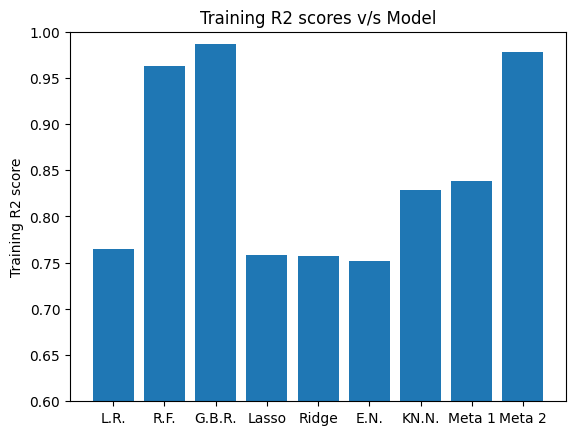

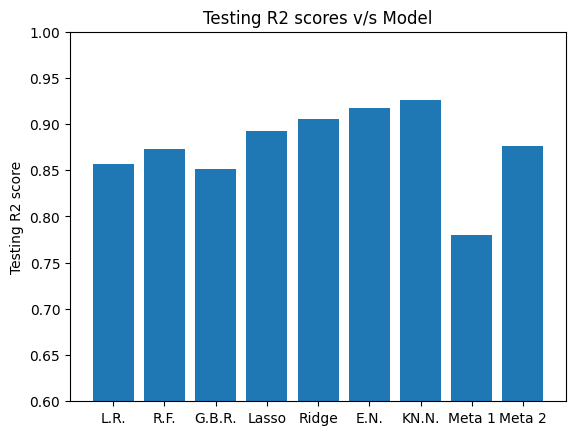

In [19]:
import matplotlib.pyplot as plt
training_r2_scores=[lin_regr_score,ran_for_score,gbr_score,lasso_score,ridge_score,eln_score,knn_score,meta_model1_score,meta_model2_score]
x_axis=['L.R.','R.F.','G.B.R.','Lasso','Ridge','E.N.','KN.N.','Meta 1','Meta 2']
testing_r2_scores=[lin_regr_score1,ran_for_score1,gbr_score1,lasso_score1,ridge_score1,eln_score1,knn_score1,meta_model1_score1,meta_model2_score1]
plt.bar(x_axis,training_r2_scores)
plt.title('Training R2 scores v/s Model')
plt.ylabel('Training R2 score')
plt.ylim(0.6,1)
plt.show()
plt.bar(x_axis,testing_r2_scores)
plt.title('Testing R2 scores v/s Model')
plt.ylabel('Testing R2 score')
plt.ylim(0.6,1)
plt.show()

In [20]:
from tabulate import tabulate
result=[
  ['Model','Training R2','Testing R2'],
  ['Linear Regression',lin_regr_score,lin_regr_score1],
  ['Random Forest',ran_for_score,ran_for_score1],
  ['Gradient Boosting Regression',gbr_score,gbr_score1],
  ['Lasso Regression',lasso_score,lasso_score1],
  ['Ridge Regression',ridge_score,ridge_score1],
  ['Elastic Net',eln_score,eln_score1],
  ['K Nearest Neighbor',knn_score,knn_score1],
  ['Meta Model 1',meta_model1_score,meta_model1_score1],
  ['Meta Model 2',meta_model2_score,meta_model2_score1]
]
print(tabulate(result))

----------------------------  ------------------  ------------------
Model                         Training R2         Testing R2
Linear Regression             0.7649544640156457  0.8569099516531293
Random Forest                 0.9626502507063386  0.8727083903181158
Gradient Boosting Regression  0.986697562631916   0.8510624908792103
Lasso Regression              0.7587609595533347  0.8926265382027356
Ridge Regression              0.7573481634864512  0.9059732958621366
Elastic Net                   0.7517026829319426  0.917261060348693
K Nearest Neighbor            0.8284131039395215  0.925756008281763
Meta Model 1                  0.8384647525153689  0.7798194369773853
Meta Model 2                  0.9775553316438672  0.8757458007020247
----------------------------  ------------------  ------------------


In [21]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 20.8 MB/s eta 0:00:00


In [22]:
import shap
explainer = shap.KernelExplainer(knn.predict, X)
shap_values = explainer.shap_values(X)

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names


  0%|          | 0/102 [00:00<?, ?it/s]

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
X does not have valid feature names, but KNeighborsRegressor was fitted with feature names

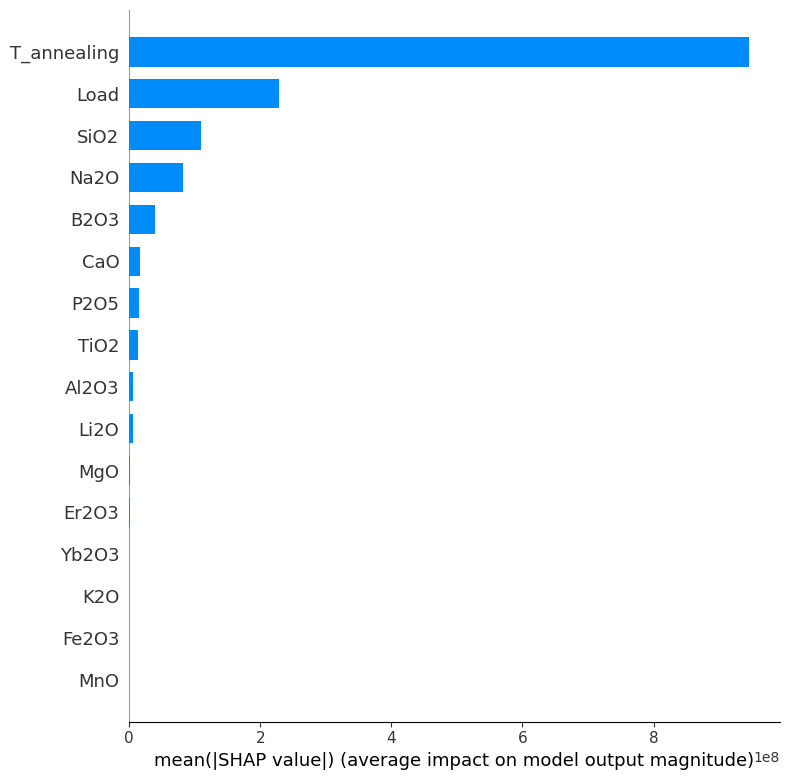

In [23]:
shap.summary_plot(shap_values, X, plot_type='bar')

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


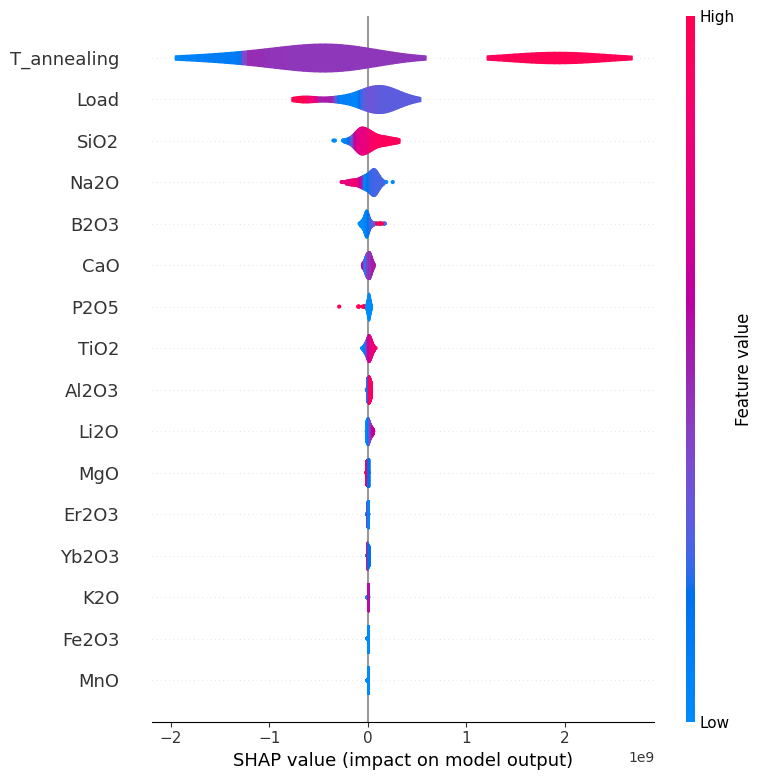

In [24]:
shap.summary_plot(shap_values, X, plot_type='violin')

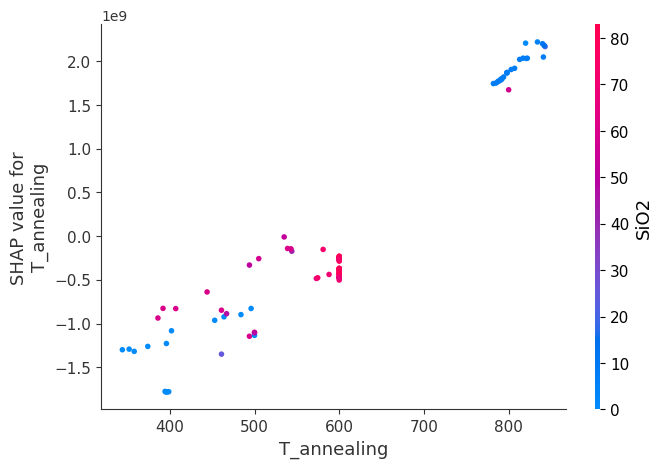

In [54]:
shap.dependence_plot('T_annealing', shap_values, X)

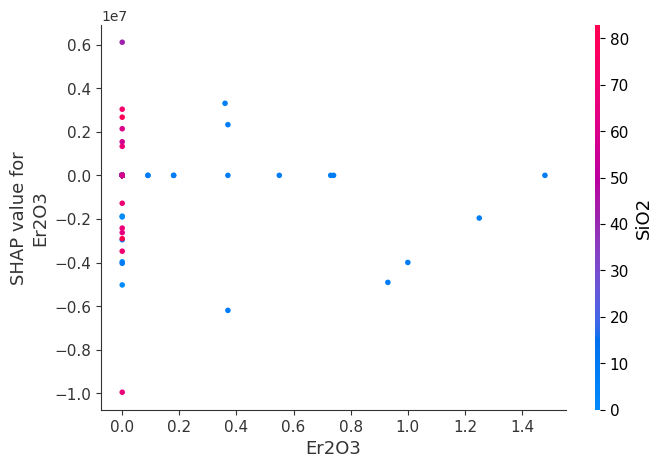

In [53]:
shap.dependence_plot('Er2O3', shap_values, X)

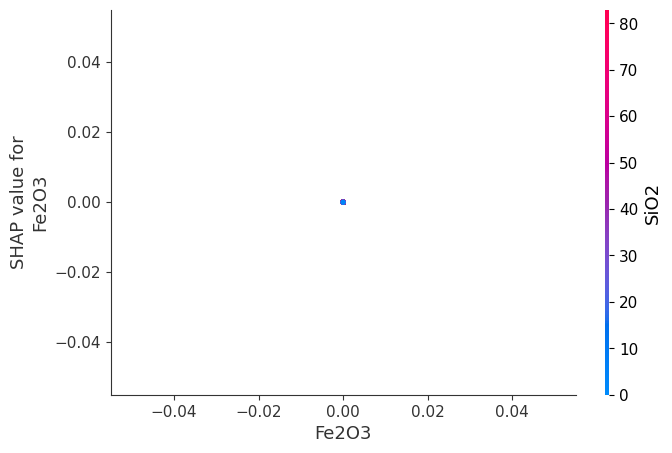

In [52]:
shap.dependence_plot('Fe2O3', shap_values, X)

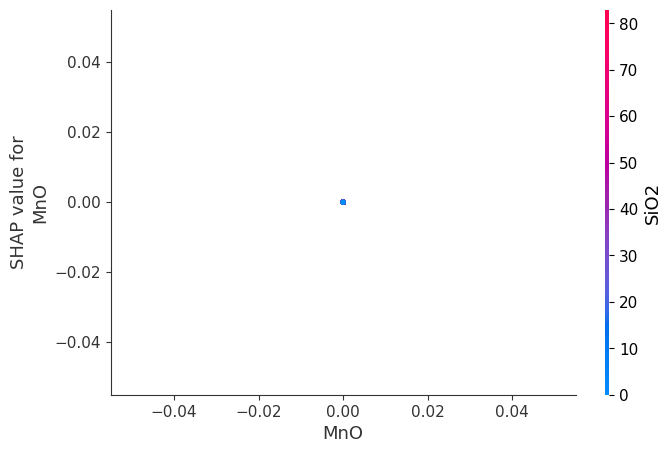

In [60]:
shap.dependence_plot('MnO', shap_values, X)